<a href="https://colab.research.google.com/github/raushan9jnv/MachineLearning-Projects/blob/main/Detection%20of%20Parkinson%20Disease%20using%20Data%20Science/Detecting_Parkinson's_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecting Parkinson's Disease**
**Author: Raushan  Kumar**
 

**Steps followed in this project:**
1. Objective
2. About Parkinson’s Disease
3. Explore dataset
4. Exploratory Data Aalysis(EDA)
5. Peparing the Data
6. Implementing Linear Regression
7. Making Predictions
8. Regression Evaluation Metrics
9. Conclusion

# **OBJECTIVE**

In this Machine Learning project we have asked to Detect the Parkinson's Diseases.

We were given with **parkinsons** dataset and this contain 195 rows and 24 coulmns.

# **What is Parkinson’s Disease?**

 ### Parkinson’s disease is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness. It has 5stages to it and affects more than 1 million individuals every year in India.This is chronic and has no cure yet. It is a neurodegenerative disorderaffecting dopamine-producing neurons in the brain.
 ---
 





# **Time to Explore and Dive into Given Dataset**

In [85]:
# Let us begin with importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### **I will start by importing the csv file into pandas dataframe called df_parkisons.**

In [86]:
# Path of dataset from remote link 
url ='https://raw.githubusercontent.com/chaitanyabaranwal/ParkinsonAnalysis/master/parkinsons.csv'

In [87]:
# importing Parkisons data
df_parkisons = pd.read_csv(url)
print("Data imported Successfully")

Data imported Successfully


### **Explore the DataFrame**

In [88]:
# print the shape of Dataframe
print(f"The shape of parkisons Dataframe is {df_parkisons.shape}")

The shape of parkisons Dataframe is (195, 24)


In [89]:
# print the columns of Two dataframes
print(f"The columns of parkisons Dataframe are \n \n {df_parkisons.columns}\n")

The columns of parkisons Dataframe are 
 
 Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'status'],
      dtype='object')



In [90]:
# print the 5 head and 5 row of parkisons Dataframe
concat_parkisons = pd.concat([df_parkisons.head(5),df_parkisons.tail(5)])
concat_parkisons

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569,0


In [91]:
# print rows and column of play store data

print(f"There are total {df_parkisons.shape[0]} rows and {df_parkisons.shape[1]} columns in parkisons Dataframe.")

There are total 195 rows and 24 columns in parkisons Dataframe.


In [92]:
# Quick info of our dataset
df_parkisons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [93]:
# Names of column
df_parkisons.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'status'],
      dtype='object')

In [94]:
#Quick Statistical inforamtion of our dataset 
df_parkisons.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


In [95]:
def parkisonsInfo():
  pinfo_df = pd.DataFrame(index=df_parkisons.columns)
  pinfo_df['Datatypes'] =  df_parkisons.dtypes
  pinfo_df['Count of non-null values'] = df_parkisons.count()
  pinfo_df['NaN values'] = df_parkisons.isnull().sum()
  pinfo_df['% NaN Values'] = (pinfo_df['NaN values']/len(df_parkisons)).round(4)*100   # or df_apps.isnull().mean()
  pinfo_df['Unique_count'] = df_parkisons.nunique()
  return pinfo_df
parkisonsInfo()

,Datatypes,Count of non-null values,NaN values,% NaN Values,Unique_count
name,object,195,0,0.0,195
MDVP:Fo(Hz),float64,195,0,0.0,195
MDVP:Fhi(Hz),float64,195,0,0.0,195
MDVP:Flo(Hz),float64,195,0,0.0,195
MDVP:Jitter(%),float64,195,0,0.0,173
MDVP:Jitter(Abs),float64,195,0,0.0,19
MDVP:RAP,float64,195,0,0.0,155
MDVP:PPQ,float64,195,0,0.0,165
Jitter:DDP,float64,195,0,0.0,180
MDVP:Shimmer,float64,195,0,0.0,188


In [96]:
# duplicate
len(df_parkisons[df_parkisons.duplicated()])

0

**Findings**

* From the above, we understand that

    1. The number of null values are zero.
    2. There three types of datatype Object, Float and other is Integer.
    3. And there no any duplicated value.



# **Exploratory Data Analysis**

---



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Scores')

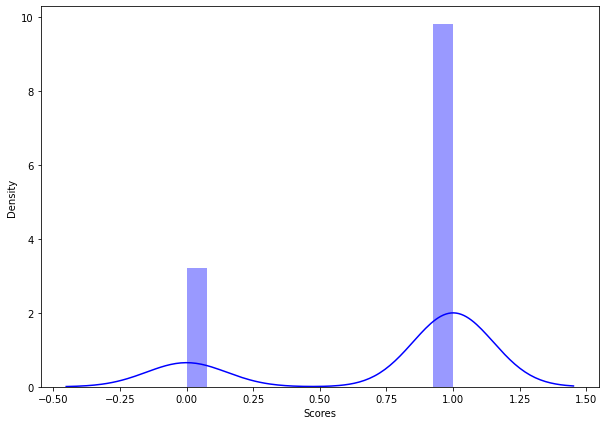

In [97]:
# distribution plot of status column
plt.figure(figsize=(10,7))
sns.distplot((df_parkisons['status']),color='b')
plt.xlabel('Scores')

**Findings**

* From the above, we understand that most of the status are **1** means positive.
 



In [98]:
#get all numeric features from dataset
numeric_features = df_parkisons.describe().columns

In [99]:
numeric_features

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'status'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


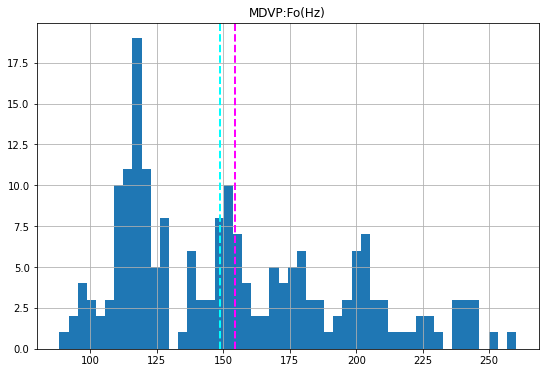

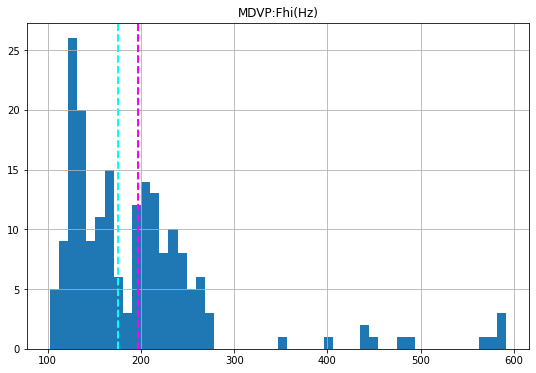

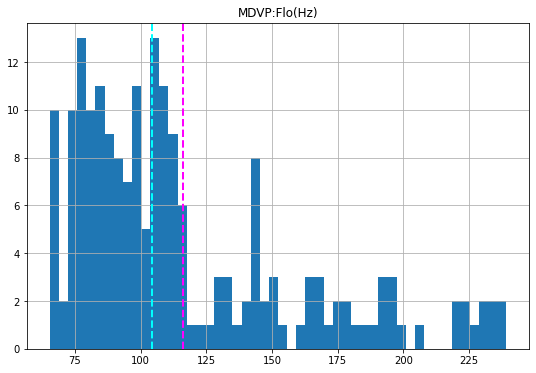

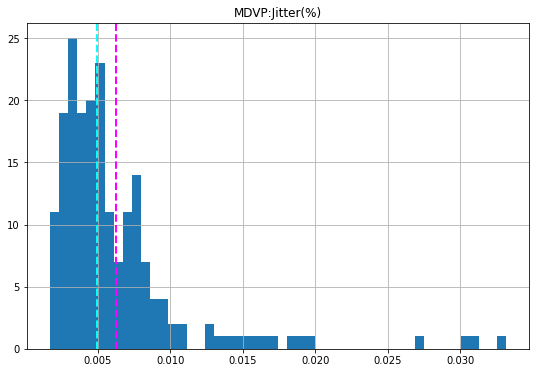

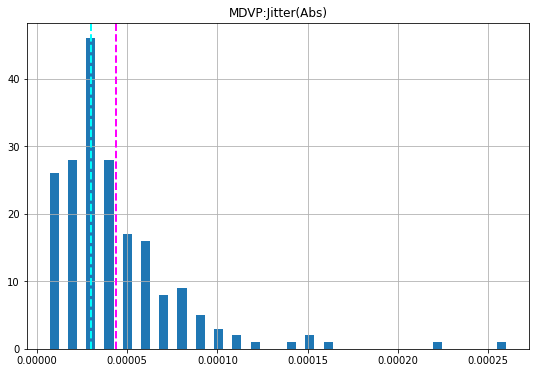

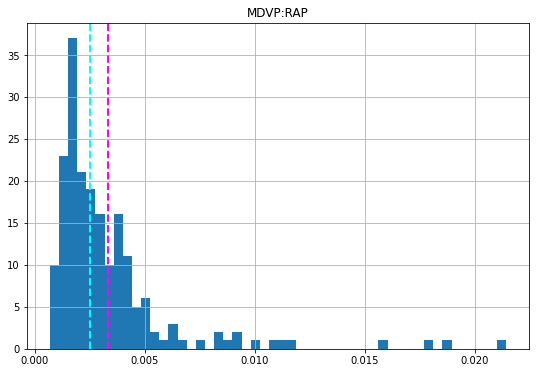

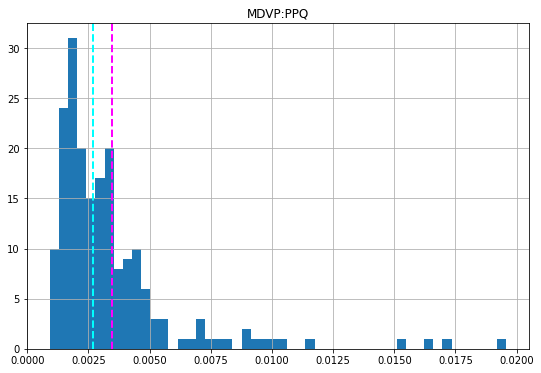

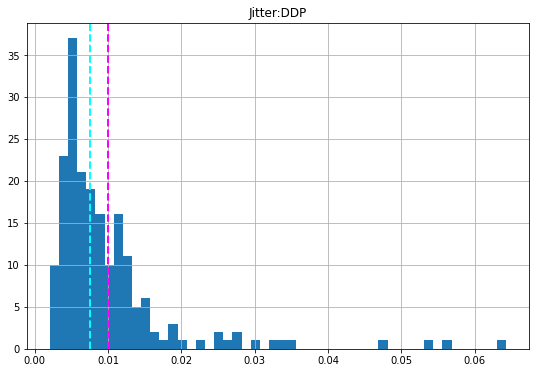

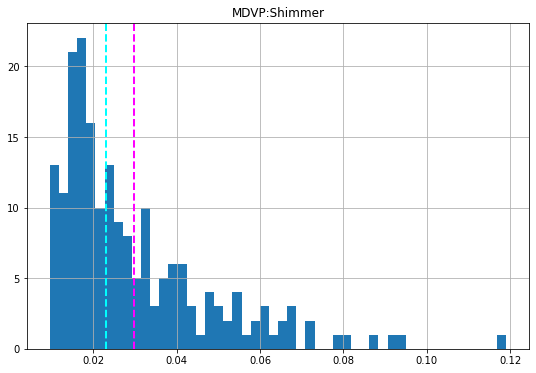

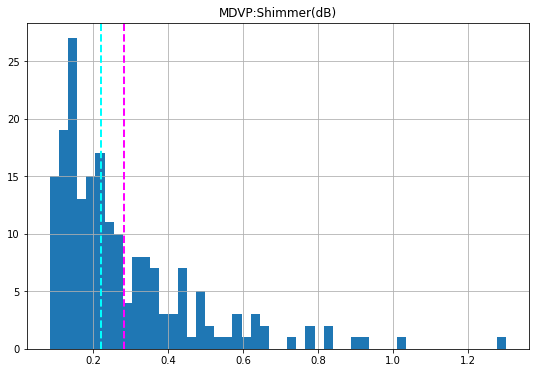

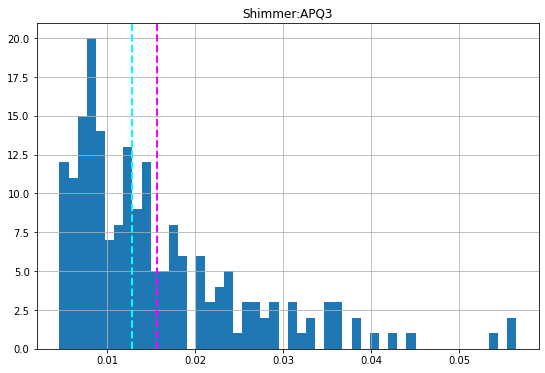

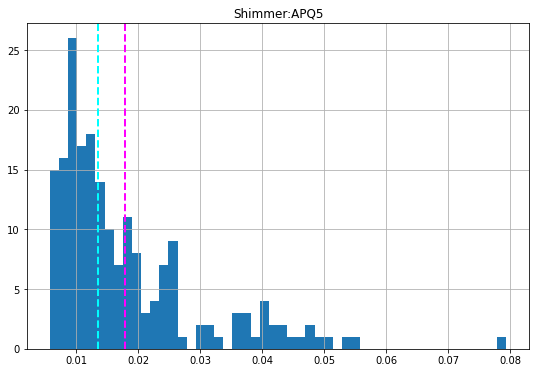

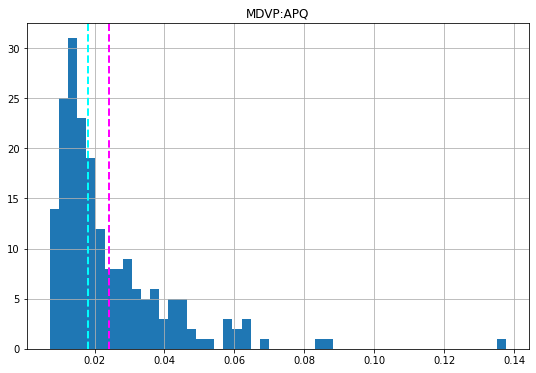

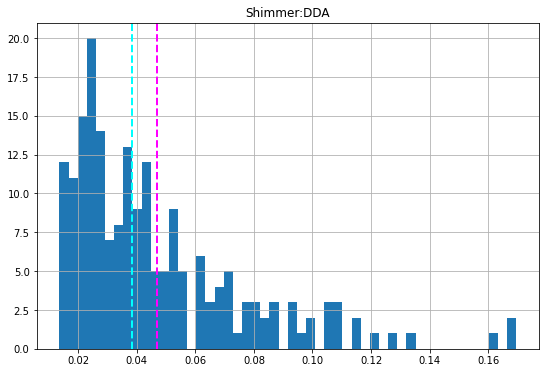

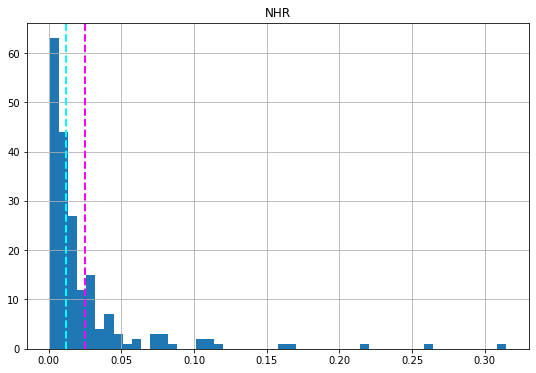

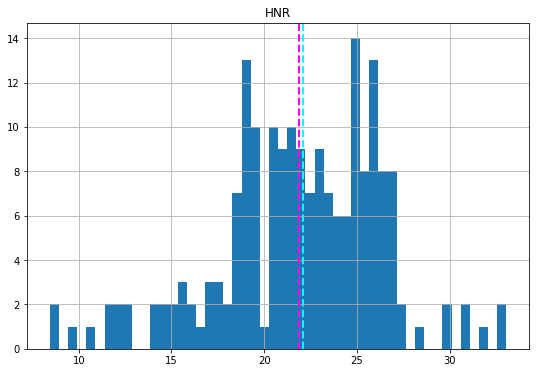

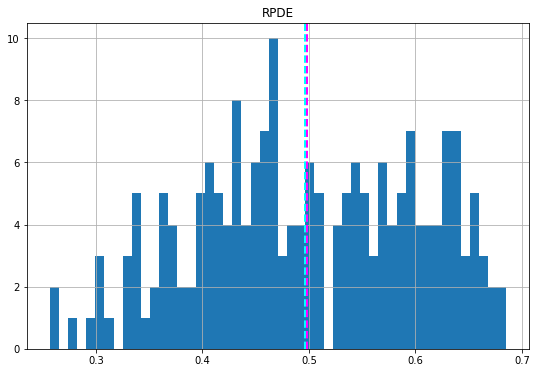

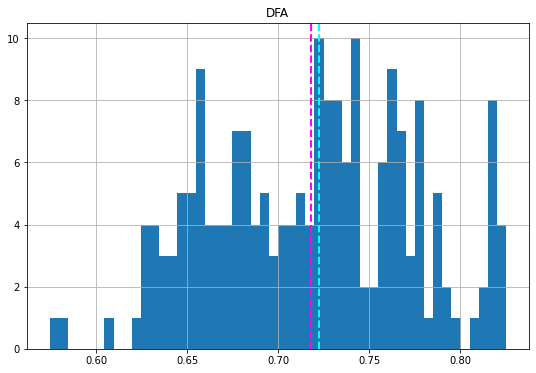

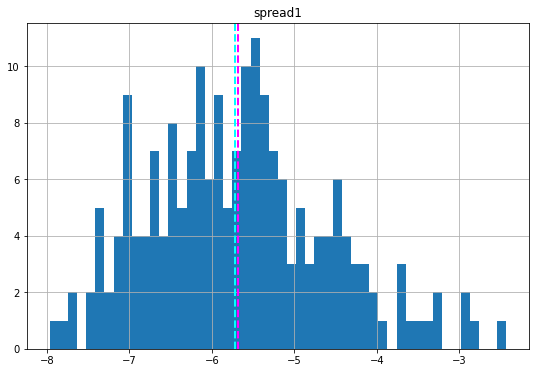

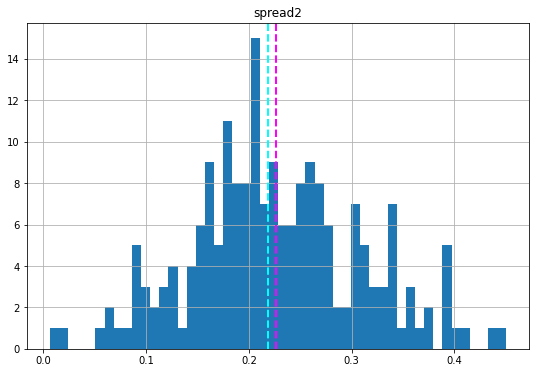

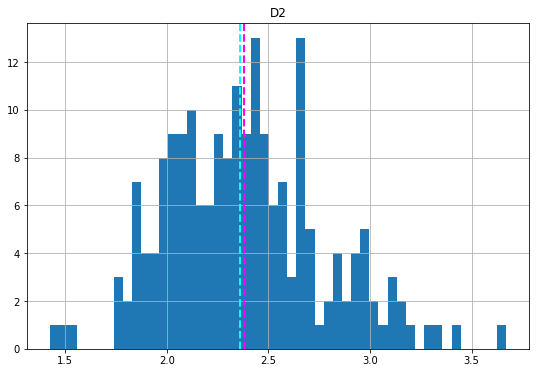

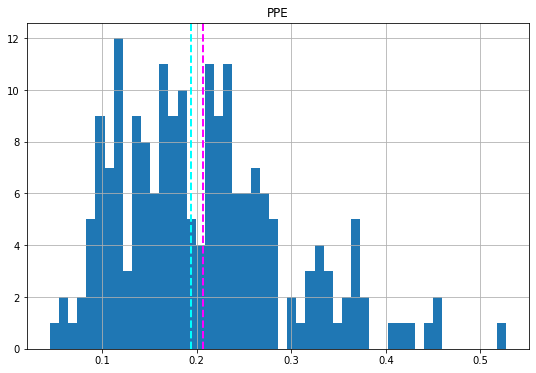

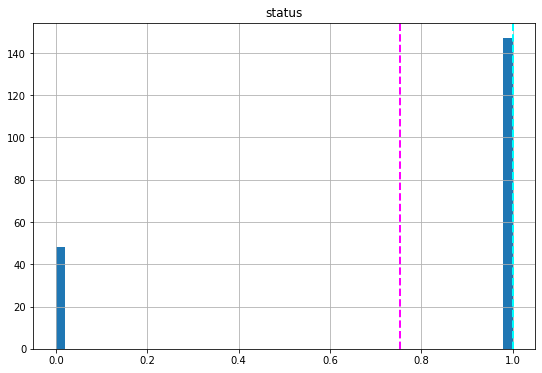

In [100]:
#plot distribution for every numric features
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_parkisons[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

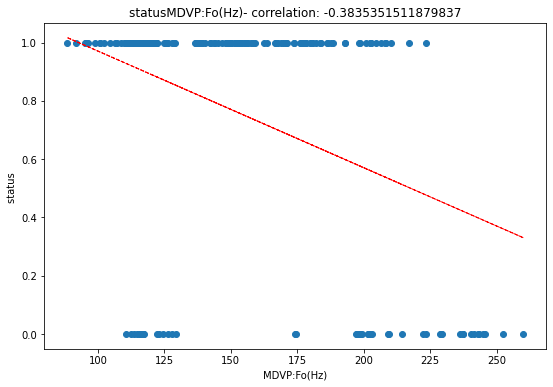

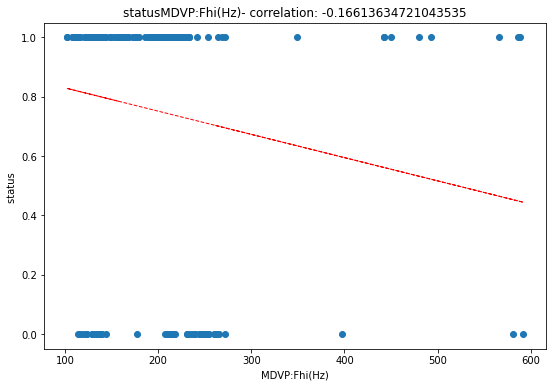

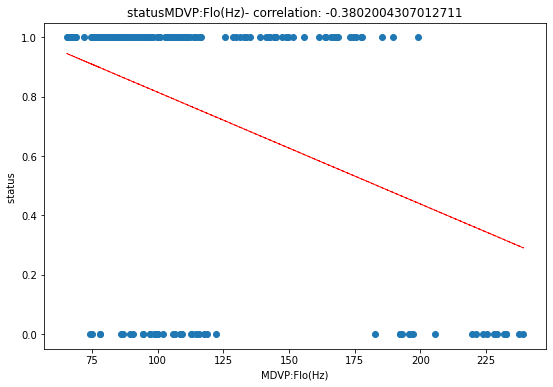

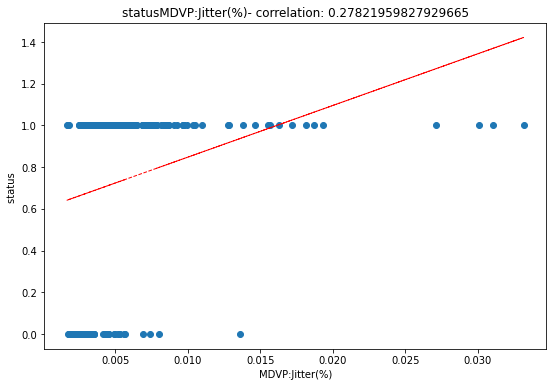

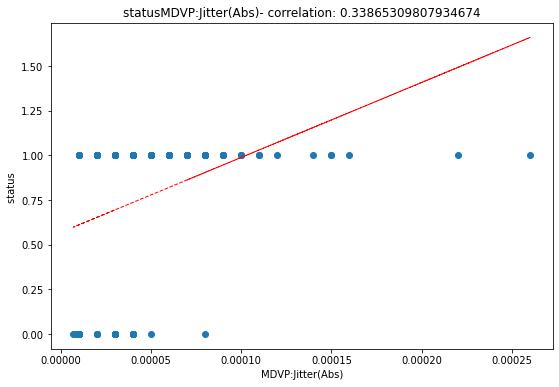

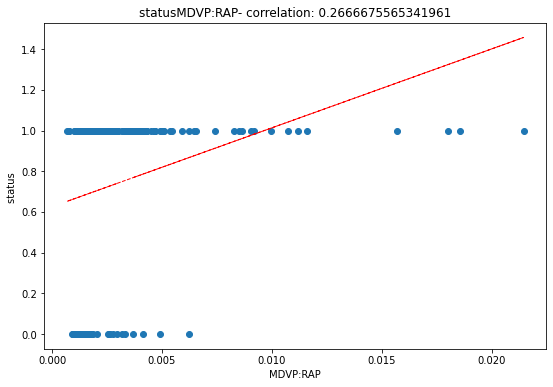

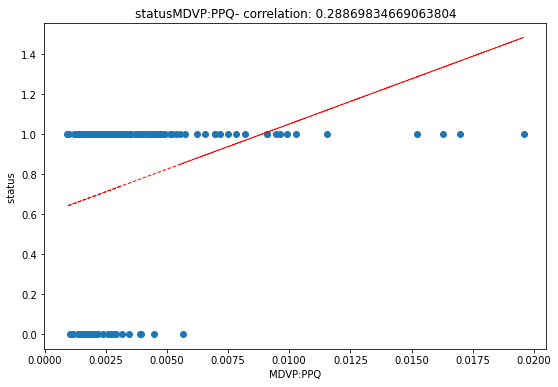

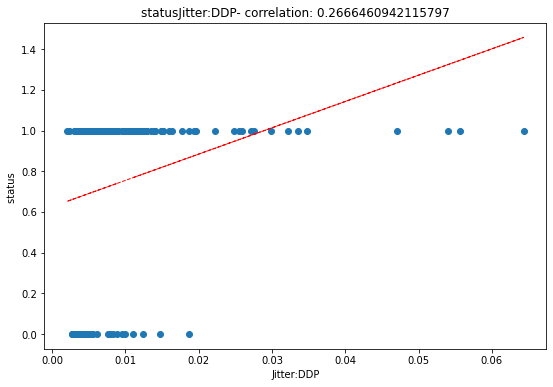

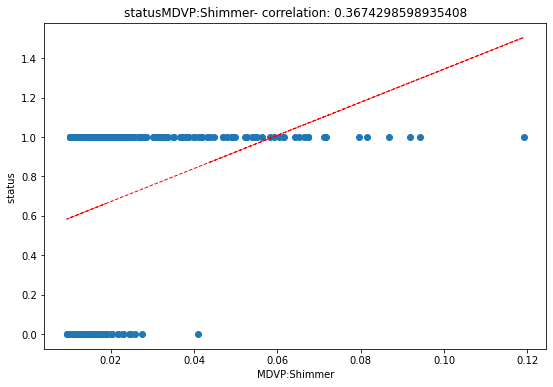

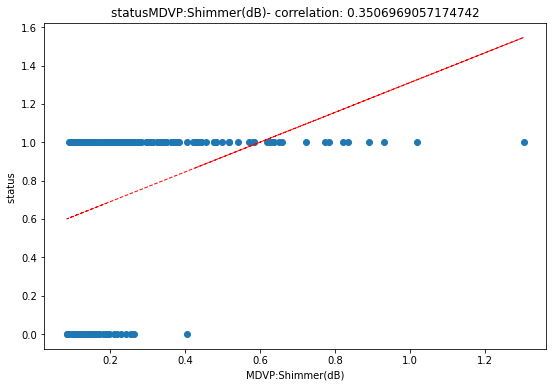

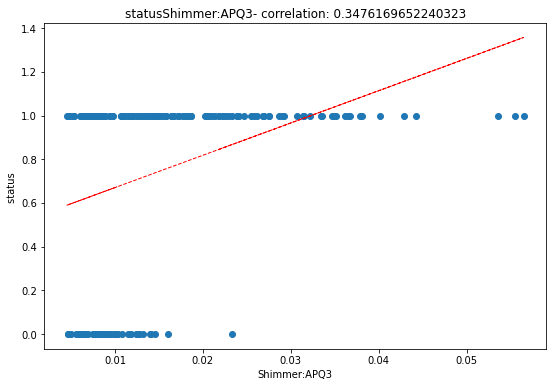

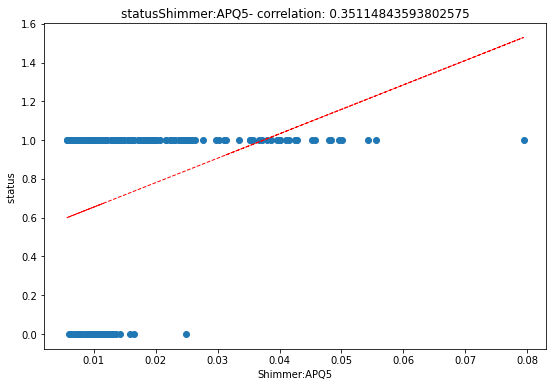

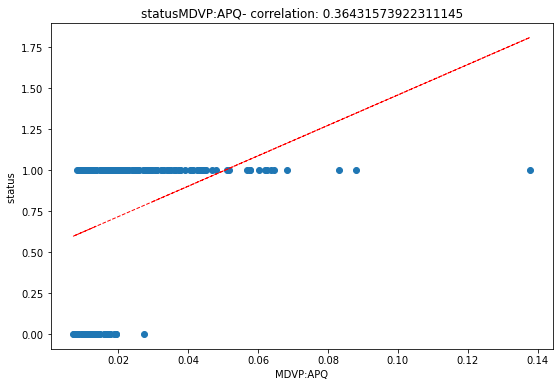

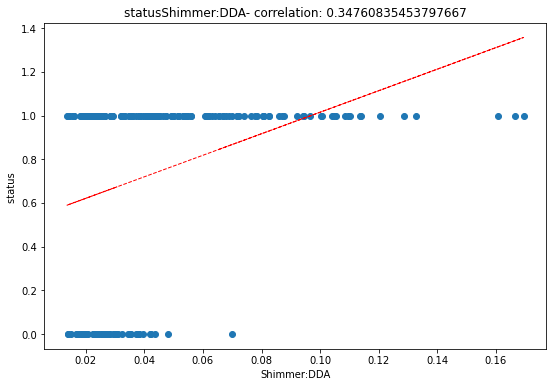

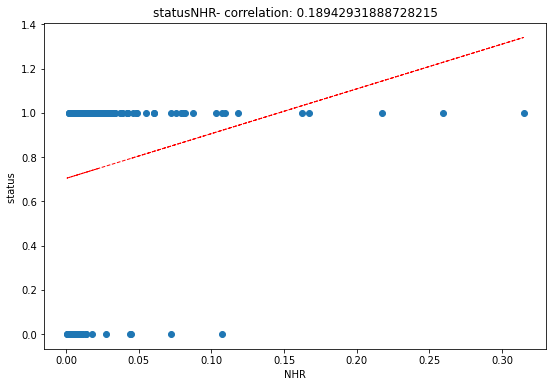

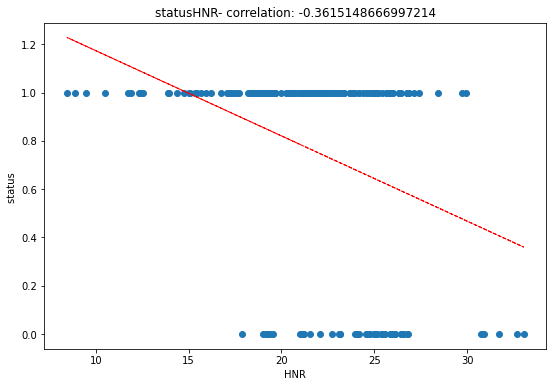

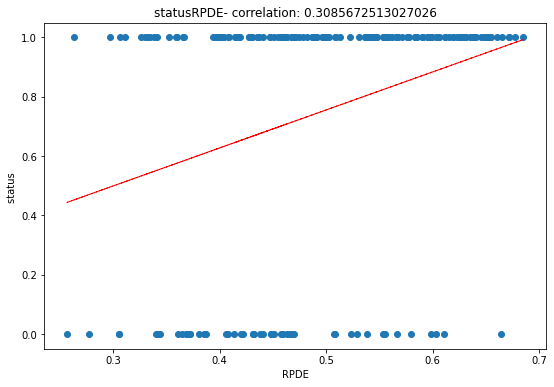

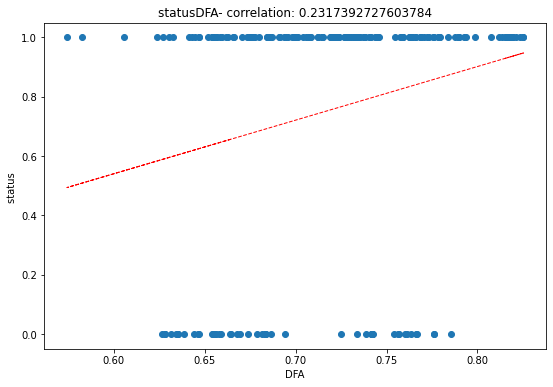

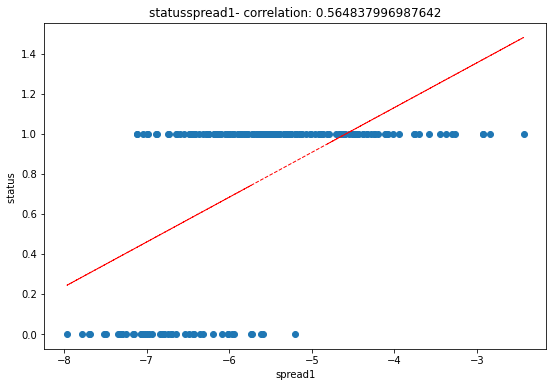

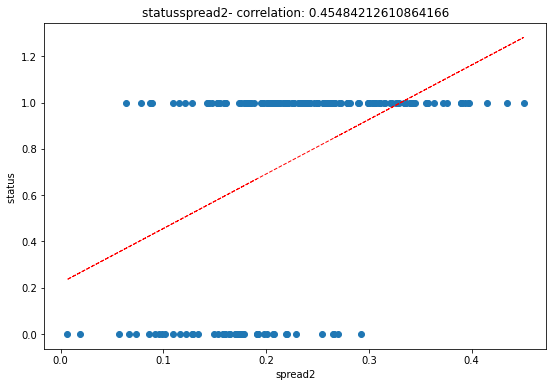

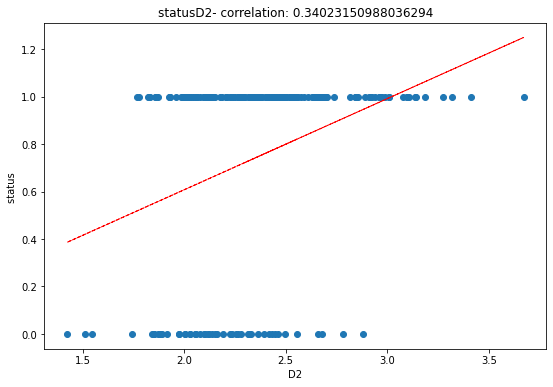

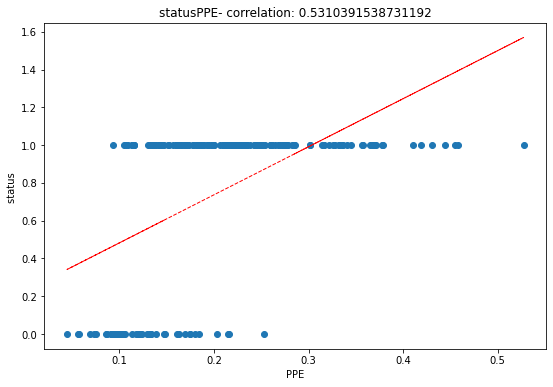

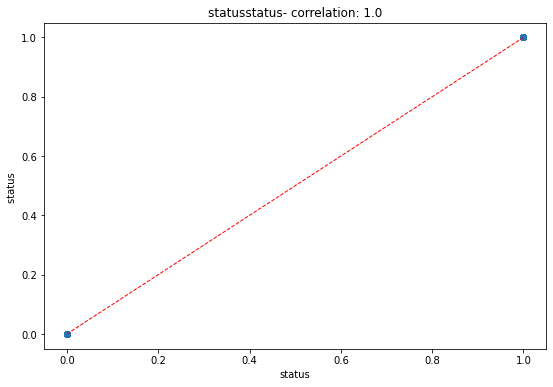

In [101]:
# plot for status column with every other features
for col in numeric_features:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df_parkisons[col]
   label = df_parkisons['status']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('status ')
   ax.set_title('status' + col + '- correlation: ' + str(correlation))
   z = np.polyfit(df_parkisons[col], df_parkisons['status'], 1)
   y_hat = np.poly1d(z)(df_parkisons[col])
 
   plt.plot(df_parkisons[col], y_hat, "r--", lw=1)
 
plt.show()

# **Preparing the data**
___

The Next step is to divide the data into 'Attributes' (inputs) and 'labels'  (outputs).

In [102]:
#Get the features and labels 
features=df_parkisons.loc[:,df_parkisons.columns!='status'].values[:,1:] 
labels=df_parkisons.loc[:,'status'].values

In [103]:
#Get the count of each label (0 and 1) in labels 
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [104]:
#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))

x=scaler.fit_transform(features)
y=labels

# **Implementing Linear Regression**

---
Let's now begin to train out regression model! We will need to first split up our data into an train array that contains the part of dataset used for training data, and a test array used for test data.


In [105]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [106]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# **Making Predictions**
___

Let's trained our algorithm 

In [80]:
#Calculate the accuracy\n",
y_pred=model.predict(x_test)

94.87179487179486


In [ ]:
print(accuracy_score(y_test, y_pred)*100)

In [110]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


# **Regression Evaluation Metrics**

---


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

1n∑i=1n|yi−y^i| 
 
**Mean Squared Error (MSE)** is the mean of the squared errors:

1n∑i=1n(yi−y^i)2
 
**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

1n∑i=√1n(yi−y^i)2
 
Comparing these metrics:

**MAE** is the easiest to understand, because it's the average error.
<br>**MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
<br>**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
<br>All of these are loss functions, because we want to minimize them.

In [109]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 4.153846153846154
MAE : 0.46153846153846156
RMSE : 2.0380986614602725


# **Conclusion**



---
In this Python machine learning project, we learned to detect the presence of Parkinson’s Disease inindividuals using various factors. We used an XGBClassifier for this and made use of the sklearn library toprepare the dataset. This gives us an accuracy of 94.87%, which is great considering the number of lines of code in this python project.




# **Thank You**